# 1 Linear Regression

In [1]:
import numpy as np

# create data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


## Normal Equation

### From Scratch

In [3]:
# get theta
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.86609156],
       [3.10875466]])

In [4]:
# make predictions

# create test input
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance

# predict
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86609156],
       [10.08360089]])

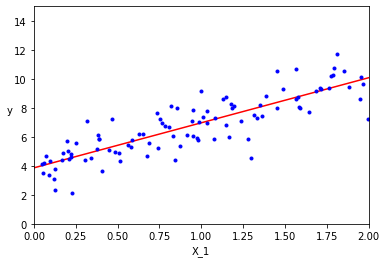

In [5]:
# plotting the model's predictions
import matplotlib.pyplot as plt 

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.ylabel("y", rotation = 0)
plt.xlabel("X_1")
plt.show()

## Using Scikit-learn

In [6]:
from sklearn.linear_model import LinearRegression

# set up and fit
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# scikit-learn have separate variables 
# for the intercept and the coefficients
lin_reg.intercept_, lin_reg.coef_

(array([3.86609156]), array([[3.10875466]]))

In [8]:
lin_reg.predict(X_new)

array([[ 3.86609156],
       [10.08360089]])

# 2 Gradient Descent

## Batch Gradient Descent

In [9]:
lr = 0.1 # learning rate
n_iterations = 1000
m = 100 # dataset size

theta = np.random.randn(2,1) # random initialization - two parameters

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - lr*gradients

theta

array([[3.86609156],
       [3.10875466]])

## Stochastic Gradient Descent (With simple learning schedule)

In [10]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0/(t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index: random_index+1]
    yi = y[random_index:random_index+1]

    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    lr = learning_schedule(epoch*m*i)
    theta = theta - lr*gradients
theta

array([[4.44099314],
       [3.14514564]])

## Linear Regression with Stochastic Gradient Descent on different learning rate schedule

*The description for each learning rate schedule can be found in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

### with default: invscaling -- inverse scaling learning rate schedule

‘invscaling’: eta = eta0 / pow(t, power_t)

In [11]:
# implicit
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.87496891]), array([3.1481338]))

In [12]:
# explicit
from sklearn.linear_model import SGDRegressor
sgd_reg_inv = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, learning_rate='invscaling')
sgd_reg_inv.fit(X, y.ravel())

sgd_reg_inv.intercept_, sgd_reg.coef_

(array([3.89545193]), array([3.1481338]))

### with constant learning rate schedule

eta = eta0

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg_const = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, learning_rate="constant")
sgd_reg_const.fit(X, y.ravel())

sgd_reg_const.intercept_, sgd_reg.coef_

(array([3.97786901]), array([3.1481338]))

### with optimal learning rate schedule

‘optimal’: eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou.

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg_opt = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, learning_rate='optimal')
sgd_reg_opt.fit(X, y.ravel())

sgd_reg_opt.intercept_, sgd_reg.coef_

(array([3.30363438e+10]), array([3.1481338]))

### wih adaptive learning rate schedule

‘adaptive’: eta = eta0, as long as the training keeps decreasing. Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol or fail to increase validation score by tol if early_stopping is True, the current learning rate is divided by 5.

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg_adpt = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, learning_rate='adaptive')
sgd_reg_adpt.fit(X, y.ravel())

sgd_reg_adpt.intercept_, sgd_reg.coef_

(array([3.88094515]), array([3.1481338]))

In [16]:
import matplotlib.pyplot as plt

intercepts = [theta_best[0], sgd_reg.intercept_, sgd_reg_const.intercept_,  \
              sgd_reg_opt.intercept_, sgd_reg_adpt.intercept_ ]

final_intercepts = [float(i) for i in intercepts]

coefs = [theta_best[1], sgd_reg.coef_, sgd_reg_const.coef_,  \
              sgd_reg_opt.coef_, sgd_reg_adpt.coef_]
final_coefs = [float(i) for i in coefs]



In [17]:
final_intercepts

[3.8660915641163136,
 3.874968907313952,
 3.9778690097261116,
 33036343778.109802,
 3.880945148596454]

In [18]:
final_coefs

[3.108754664503339,
 3.14813380348842,
 3.374421743309838,
 506597863174.96295,
 3.0976619700476404]

The default inverse scaling and the adaptive learning rate schedule are the ones closest to the output of the Normal Equation

## Are there implementations of Batch Gradient Descent and Mini-batch Gradient Descent for Linear Classifiers in Scikit-Learn? None.

*As of July 25, 2019* <br>
https://github.com/scikit-learn/scikit-learn/issues/14468 


**Hanmin Qin**: Currently, we support batch gradient descent (e.g., LogisticRegression), and stochastic gradient descent (e.g., SGDClassifier/SGDRegressor), but we do not support Mini-Batch gradient descent (SGDClassifier/SGDRegressor.partial_fit is not Mini-Batch gradient descent).
Mini-Batch gradient descent can support partial_fit (compared with batch gradient descent) and can sometime converge to better results (compared with stochastic gradient descent).

**Andreas Mueller**: We don't have batch gradient descent in LogisticRegression afaik because it's a terrible solver.
I'm not sure if there's a reason to do mini-batches for SGDClassifier. My intuition would be that it's going to be strictly worse.

*Still an open issue started Oct 10, 2019*


# 3 Polynomial Regression

In [19]:
# create data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [20]:
# add features
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.76710406])

In [21]:
X_poly[0]

array([0.76710406, 0.58844863])

In [22]:
# train
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.0718826]), array([[0.97496259, 0.4908283 ]]))

# 4 Learning Curves


In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],
    y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

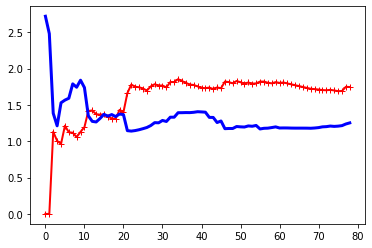

In [24]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

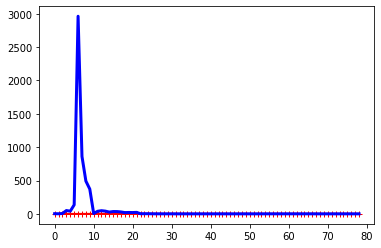

In [25]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
          ("poly_features", PolynomialFeatures(degree=6, include_bias=False)),
          ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

# 5 Regularized Linear Models

## 1. Ridge Regression, l2 norm

In [26]:
# closed-form solution
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.31642128]])

In [27]:
# using SGD
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


array([5.30063792])

## 2. Lasso Regression, l1 norm

In [28]:
# closed-form
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.27938607])

In [29]:
# using SGD
sgd_reg_lasso = SGDRegressor(penalty="l1")
sgd_reg_lasso.fit(X, y.ravel())
sgd_reg_lasso.predict([[1.5]])


array([5.30483692])

## 3. Elastic Net, mix of Ridge and Lasso Regression

In [30]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio is the mix ratio 'r'
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.27591934])

## 4. Early Stopping

In [31]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# prepare data
poly_scaler = Pipeline([
                        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# define the model
sgd_reg = SGDRegressor(max_iter =1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)
# warm_start = True
# - when the fit() method is called, it continues training
# where it left off, instead of restarting from scratch

# do early stopping manually
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  print(epoch)

  sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)
  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [32]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)

In [33]:
best_epoch

135

It's called Early Stopping but why did the code do not include the break?

Since we're dealing with Stochastic Gradient Descent, whose behavior goes up and down, this might be harder than Batch GD. 

What we did here is to monitor the validation error with respect to the training error after some number of epochs. As the model goes through each epoch, we store the model with the least validation loss. 

There can be other variations of it such as setting some counter such that if the model's validation loss stay or goes up in that number of times, you will stop training. 

# 6 Logistic Regression

## Binary Classification

In [34]:
# get data

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [35]:
import numpy as np

X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # if Iris Virginia, else 0

In [36]:
# train Log Reg model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

# Scikit-Learn actually adds an l2 penalty by default.

# The hyperparameter controlling the regularization strength of a Scikit-Learn
# LogisticRegression model is not alpha (as in other linear models), but its inverse: C
# The higher the value of C, the less the model is regularized.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

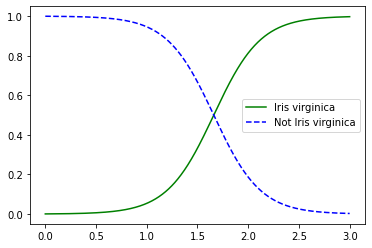

In [37]:
# model's estimated probabilities for flowers
# with petal widths varying from 0 cm to 3 cm
import matplotlib.pyplot as plt
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Not Iris virginica")
plt.legend()
plt.show()

## Multiclass Classification - Softmax Regression

In [38]:
# prepare data
X = iris["data"][:, (2,3 )] # petal length, petal width
y = iris["target"]

In [39]:
# fit
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# predict
softmax_reg.predict([[5,2]])

array([2])

In [41]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])